In [1]:
import numpy as np
import pyproj
import torch

import matplotlib.pyplot as plt

from OkadaTorch import OkadaWrapper

okada = OkadaWrapper()

In [2]:
var_list = [
    "ux", "uy", "uz", "uxx", "uxy", "uxz", "uyx", "uyy", "uyz", "uzx", "uzy", "uzz"
]

# domain

In [3]:
# domain
nlon = 121
nlat = 161
lon_min = 140.5
lon_max = 146.5
dlon = 0.05
lat_min = 34.0
lat_max = 42.0
dlat = 0.05


# coordinate transformation
pj_tmerc = f"+proj=tmerc +lon_0={(lon_min+lon_max)/2} +k=1.00010001 +ellps=WGS84 +datum=WGS84 +no_defs"  # lon_ref
pj_latlong = "+proj=latlong +ellps=WGS84 +datum=WGS84 +no_defs"
ll2xy = pyproj.Transformer.from_proj(pj_latlong, pj_tmerc, always_xy=True)
xy2ll = pyproj.Transformer.from_proj(pj_tmerc, pj_latlong, always_xy=True)

lon = np.linspace(lon_min, lon_max, nlon)
lat = np.linspace(lat_min, lat_max, nlat)
Lon, Lat = np.meshgrid(lon, lat)
X, Y = ll2xy.transform(Lon, Lat)
XX = torch.from_numpy(X/1e3)
YY = torch.from_numpy(Y/1e3)

# point source

In [4]:
# fault parameters
lat_ref = 40.2224
lon_ref = 145.8678
x_ref, y_ref = ll2xy.transform(lon_ref, lat_ref)

x_ref = torch.tensor(x_ref/1e3, requires_grad=True)
y_ref = torch.tensor(y_ref/1e3, requires_grad=True)
depth = torch.tensor(0.1, requires_grad=True)
length = torch.tensor(218.0, requires_grad=True)
width = torch.tensor(46.0, requires_grad=True)
dip = torch.tensor(60.0, requires_grad=True)
strike = torch.tensor(189.0, requires_grad=True)
rake = torch.tensor(270.0, requires_grad=True)
slip = torch.tensor(1e5, requires_grad=True)

print(XX, YY, x_ref, y_ref)

tensor([[-277.2299, -272.6078, -267.9859,  ...,  267.9859,  272.6078,
          277.2299],
        [-277.0672, -272.4478, -267.8286,  ...,  267.8286,  272.4478,
          277.0672],
        [-276.9042, -272.2876, -267.6711,  ...,  267.6711,  272.2876,
          276.9042],
        ...,
        [-248.9784, -244.8284, -240.6784,  ...,  240.6784,  244.8284,
          248.9784],
        [-248.7839, -244.6371, -240.4903,  ...,  240.4903,  244.6371,
          248.7839],
        [-248.5892, -244.4457, -240.3021,  ...,  240.3021,  244.4457,
          248.5892]], dtype=torch.float64) tensor([[3768.0986, 3767.9643, 3767.8322,  ..., 3767.8322, 3767.9643,
         3768.0986],
        [3773.6482, 3773.5138, 3773.3816,  ..., 3773.3816, 3773.5138,
         3773.6482],
        [3779.1978, 3779.0633, 3778.9310,  ..., 3778.9310, 3779.0633,
         3779.1978],
        ...,
        [4645.3490, 4645.2049, 4645.0633,  ..., 4645.0633, 4645.2049,
         4645.3490],
        [4650.9039, 4650.7599, 4650.6182, 

In [7]:
coords = {
    "x": XX,
    "y": YY
}
params = {
    "x_ref": x_ref,
    "y_ref": y_ref,
    "depth": depth,
    "strike": strike,
    "dip": dip,
    "rake": rake,
    "slip": slip
}

out = okada.compute(coords, params, True)


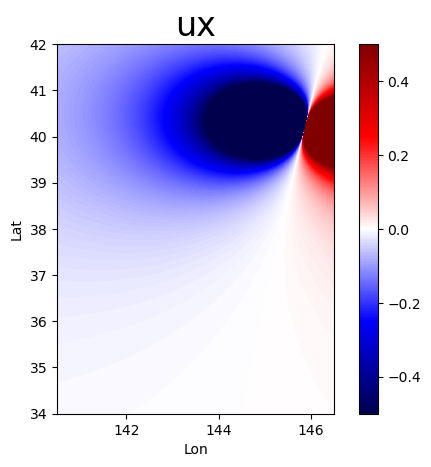

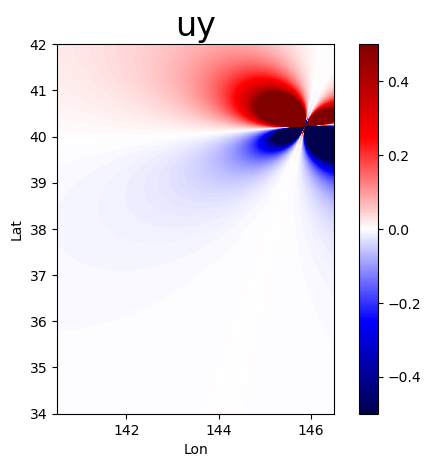

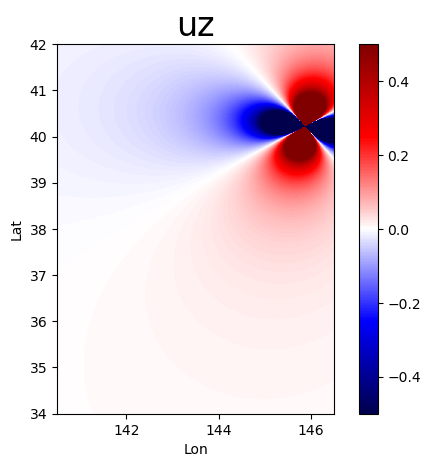

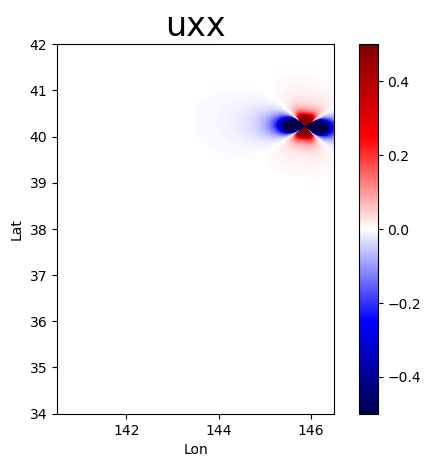

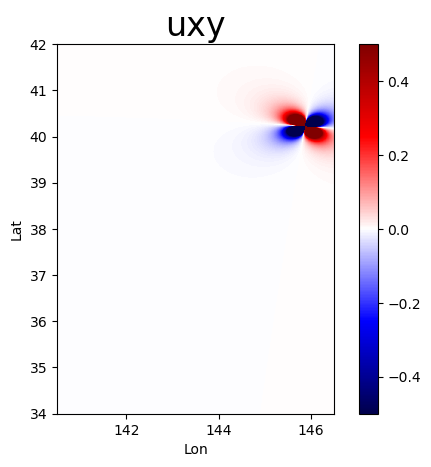

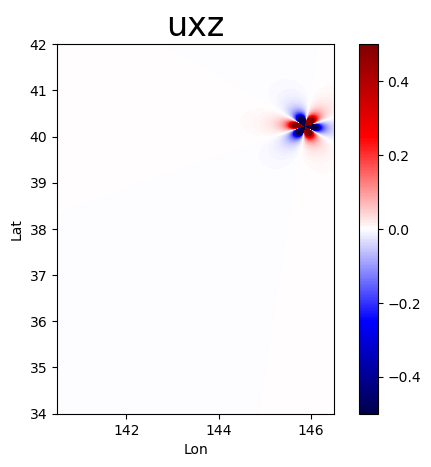

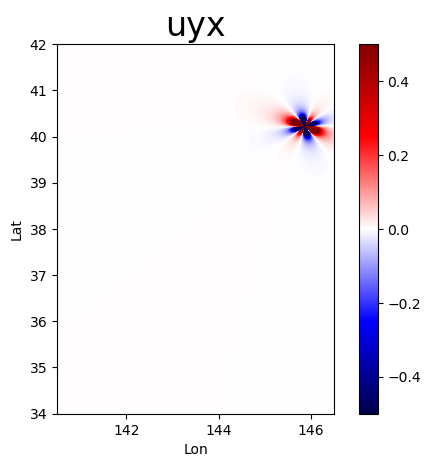

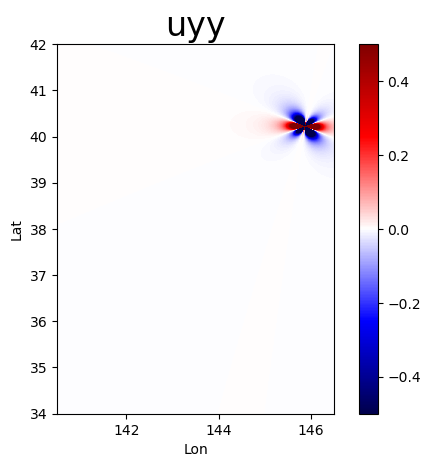

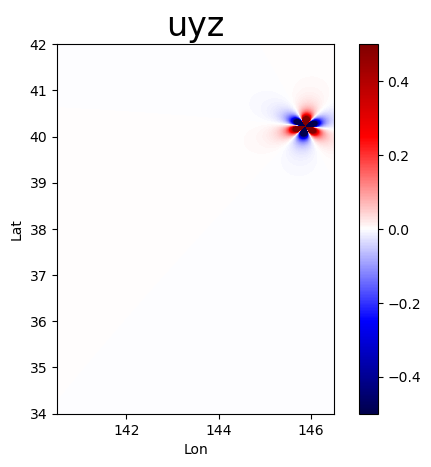

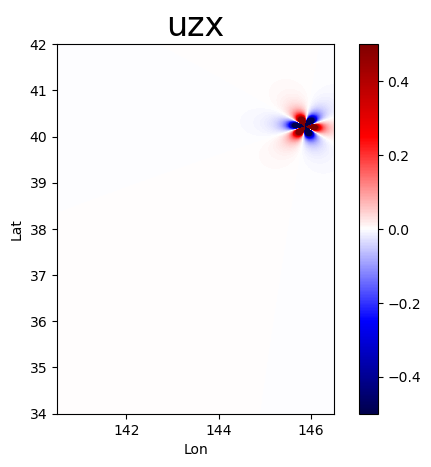

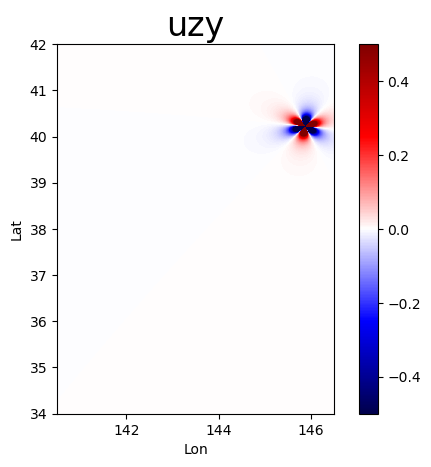

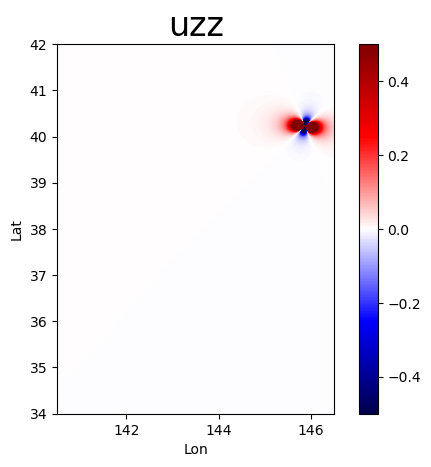

In [8]:
for i, var in enumerate(var_list):

    fig, ax = plt.subplots()
    im = ax.pcolormesh(Lon, Lat, out[i].detach().numpy(), cmap="seismic", vmin=-0.5, vmax=0.5)
    ax.set_aspect("equal")
    ax.set_xlabel("Lon")
    ax.set_ylabel("Lat")
    ax.set_title(var, fontsize=24)
    fig.colorbar(im)
    fig.show()

# rectangular fault

In [4]:
# fault parameters
lat_ref = 40.2224
lon_ref = 145.8678
x_ref, y_ref = ll2xy.transform(lon_ref, lat_ref)

x_ref = torch.tensor(x_ref/1e3, requires_grad=True)
y_ref = torch.tensor(y_ref/1e3, requires_grad=True)
depth = torch.tensor(0.1, requires_grad=True)
length = torch.tensor(218.0, requires_grad=True)
width = torch.tensor(46.0, requires_grad=True)
dip = torch.tensor(60.0, requires_grad=True)
strike = torch.tensor(189.0, requires_grad=True)
rake = torch.tensor(270.0, requires_grad=True)
slip = torch.tensor(1.0, requires_grad=True)

print(XX, YY, x_ref, y_ref)

tensor([[-277.2299, -272.6078, -267.9859,  ...,  267.9859,  272.6078,
          277.2299],
        [-277.0672, -272.4478, -267.8286,  ...,  267.8286,  272.4478,
          277.0672],
        [-276.9042, -272.2876, -267.6711,  ...,  267.6711,  272.2876,
          276.9042],
        ...,
        [-248.9784, -244.8284, -240.6784,  ...,  240.6784,  244.8284,
          248.9784],
        [-248.7839, -244.6371, -240.4903,  ...,  240.4903,  244.6371,
          248.7839],
        [-248.5892, -244.4457, -240.3021,  ...,  240.3021,  244.4457,
          248.5892]], dtype=torch.float64) tensor([[3768.0986, 3767.9643, 3767.8322,  ..., 3767.8322, 3767.9643,
         3768.0986],
        [3773.6482, 3773.5138, 3773.3816,  ..., 3773.3816, 3773.5138,
         3773.6482],
        [3779.1978, 3779.0633, 3778.9310,  ..., 3778.9310, 3779.0633,
         3779.1978],
        ...,
        [4645.3490, 4645.2049, 4645.0633,  ..., 4645.0633, 4645.2049,
         4645.3490],
        [4650.9039, 4650.7599, 4650.6182, 

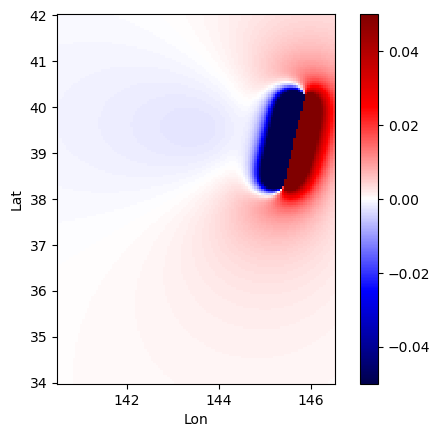

In [5]:
coords = {
    "x": XX,
    "y": YY
}
params = {
    "x_ref": x_ref,
    "y_ref": y_ref,
    "depth": depth,
    "length": length,
    "width": width,
    "strike": strike,
    "dip": dip,
    "rake": rake,
    "slip": slip
}

ux, uy, uz = okada.compute(coords, params, False)


fig, ax = plt.subplots()
im = ax.pcolormesh(Lon, Lat, uz.detach().numpy(), cmap="seismic", vmin=-0.05, vmax=0.05)
ax.set_aspect("equal")
ax.set_xlabel("Lon")
ax.set_ylabel("Lat")
fig.colorbar(im)
fig.show()

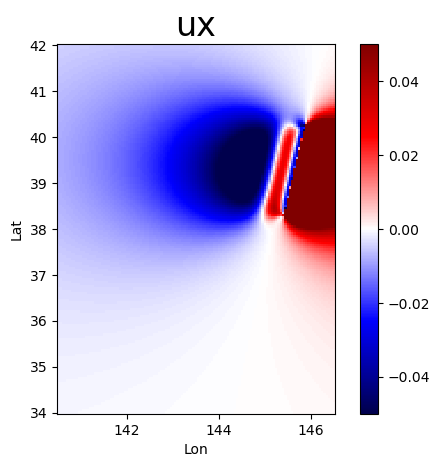

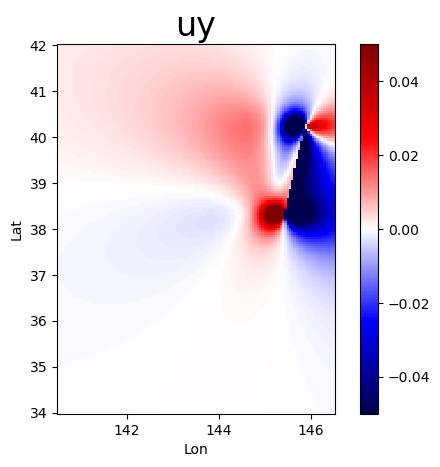

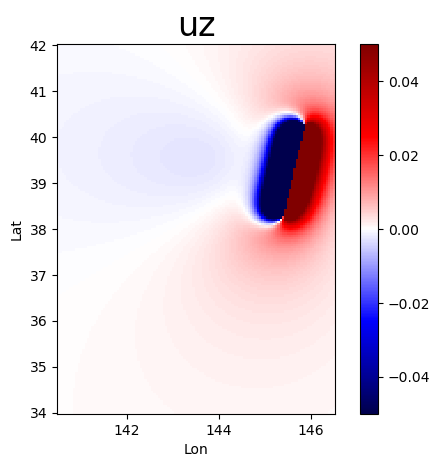

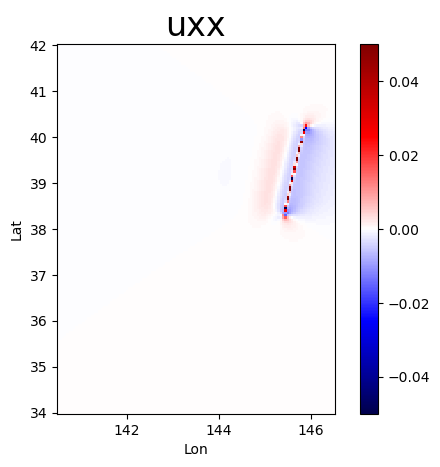

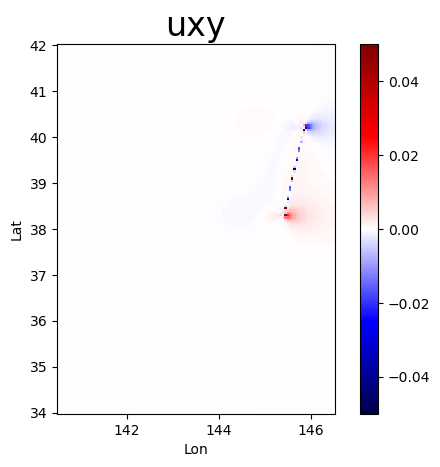

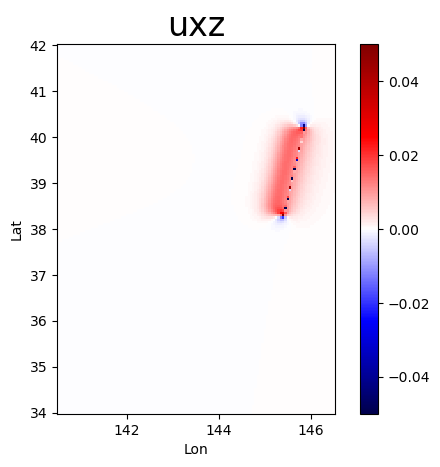

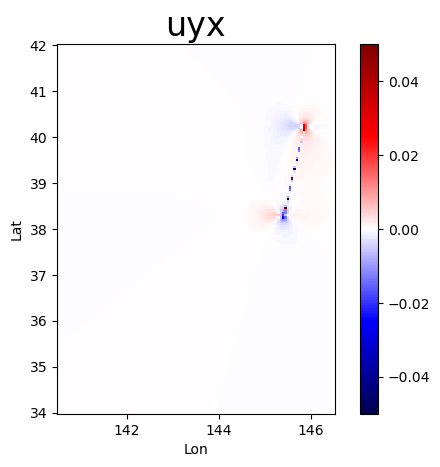

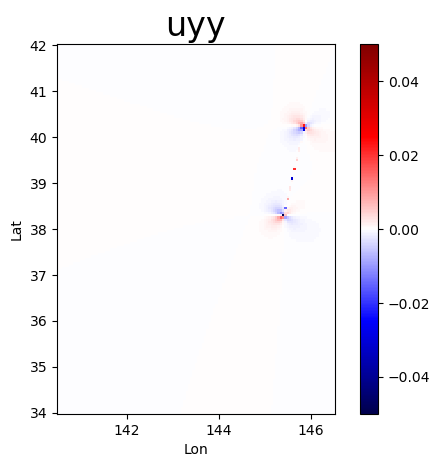

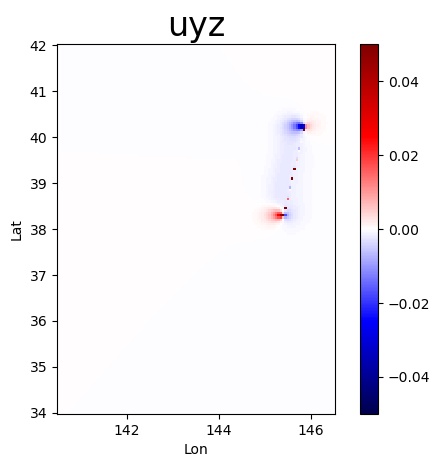

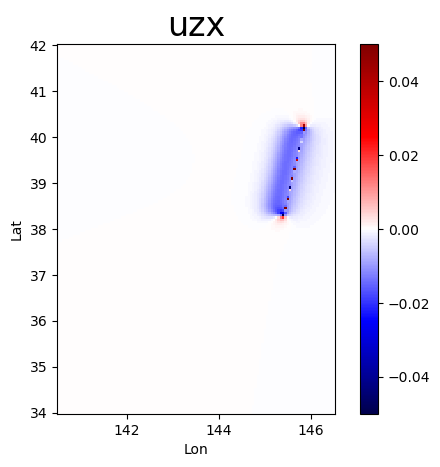

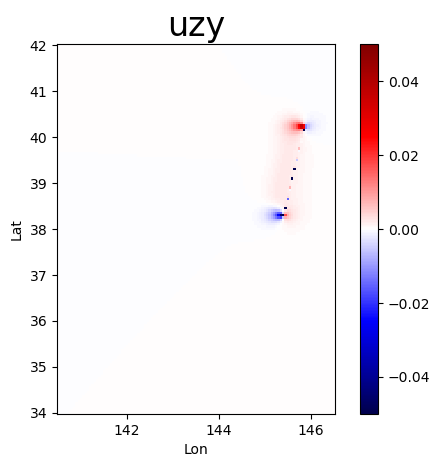

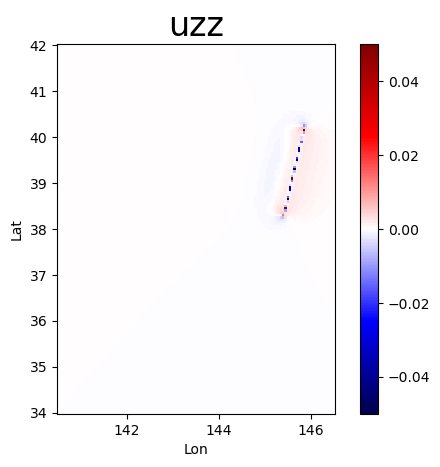

In [6]:
for i, var in enumerate(var_list):

    fig, ax = plt.subplots()
    im = ax.pcolormesh(Lon, Lat, out[i].detach().numpy(), cmap="seismic", vmin=-0.05, vmax=0.05)
    ax.set_aspect("equal")
    ax.set_xlabel("Lon")
    ax.set_ylabel("Lat")
    ax.set_title(var, fontsize=24)
    fig.colorbar(im)
    fig.show()

# gradient of uz with respect to parameters

In [25]:
# var_list = [
#     "x", "y", "x_ref", "y_ref", "depth", "length", "width", "strike", "dip", "rake", "slip"
# ]

coords = {
    "x": XX,
    "y": YY
}
params = {
    "x_ref": x_ref,
    "y_ref": y_ref,
    "depth": depth,
    "length": length,
    "width": width,
    "strike": strike,
    "dip": dip,
    "rake": rake,
    "slip": slip
}



import time

In [26]:
t1 = time.perf_counter()
ux, uy, uz, uxx, uxy, uxz, uyx, uyy, uyz, uzx, uzy, uzz = okada.compute(
    coords, params, compute_strain=True
)
t2 = time.perf_counter()
print(t2-t1)

0.09728298895061016


In [27]:
t1 = time.perf_counter()
UXX, UYX, UZX = okada.gradient(coords, params, compute_strain=False, arg="x")
UXY, UYY, UZY = okada.gradient(coords, params, compute_strain=False, arg="y")
t2 = time.perf_counter()
print(t2-t1)

0.27267968794330955


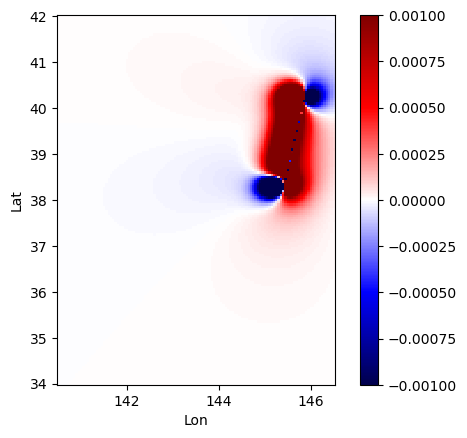

In [34]:
fig, ax = plt.subplots()
im = ax.pcolormesh(Lon, Lat, uzy.detach().numpy(), cmap="seismic", vmin=-0.001, vmax=0.001)
ax.set_aspect("equal")
ax.set_xlabel("Lon")
ax.set_ylabel("Lat")
fig.colorbar(im)
fig.show()

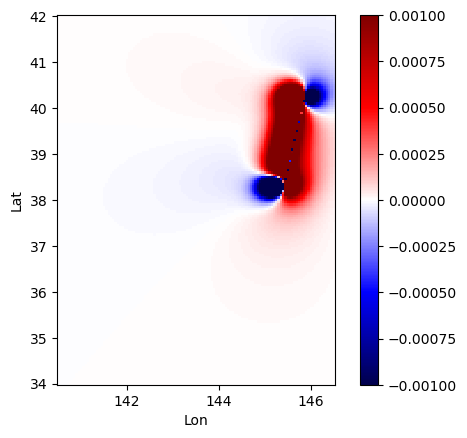

In [35]:
fig, ax = plt.subplots()
im = ax.pcolormesh(Lon, Lat, UZY.detach().numpy(), cmap="seismic", vmin=-0.001, vmax=0.001)
ax.set_aspect("equal")
ax.set_xlabel("Lon")
ax.set_ylabel("Lat")
fig.colorbar(im)
fig.show()

In [36]:
delta = uyy-UYY
delta.max(), delta.min()

(tensor(7.9614e-10, dtype=torch.float64, grad_fn=<MaxBackward1>),
 tensor(-8.5902e-10, dtype=torch.float64, grad_fn=<MinBackward1>))